<b>Name - H.M.P.Siriwardana<br>
Index- 190595J<br>
Assignment_01<br>


# 1)

Text(0.5, 1.0, 'Intensity Transformed')

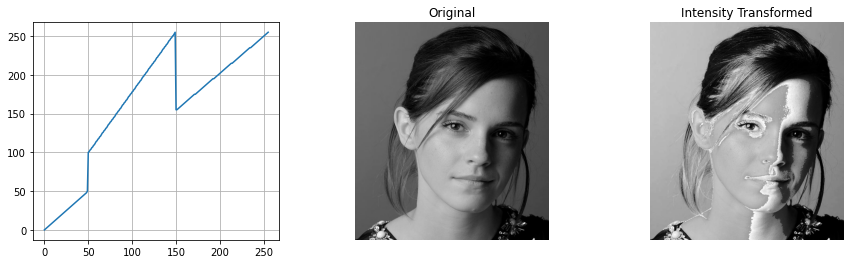

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img =cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(155,255,106)


t = np.concatenate((t1,t2,t3),axis = 0).astype(np.uint8)

g = cv.LUT(img,t)
fig,ax = plt.subplots(1,3)
fig.set_figwidth(15)


ax[1].axis('off')
ax[2].axis('off')
ax[0].grid()
ax[0].plot(t)
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("Original")
ax[2].set_title("Intensity Transformed")


In this question the intensity of each pixel (input intensity) is mapped to the output intensity of the intensity curve shown in the diagram below.For pixels having intensity  in the ranges 0-50 and 150-255 there is no change in the intensity in the output.For pixels having intensity in range 50 -150 (which is like the grey range)the intensity value is increased in the output according to the graph.

# 2)

Text(0.5, 1.0, 'Accuentuate White Matter')

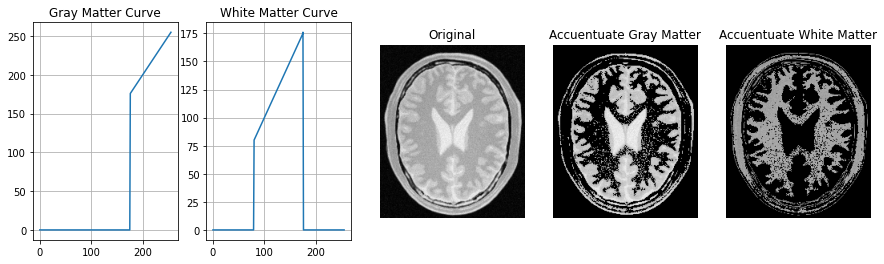

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img =cv.imread(r'./Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,0,80)
t2 = np.linspace(80,176,96)
t3 = np.linspace(0,0,80)

t4 = np.linspace(0,0,80)
t5 = np.linspace(0,0,96)
t6 = np.linspace(176,255,80)


t_white = np.concatenate((t4,t5,t6),axis = 0).astype(np.uint8)
g_white = cv.LUT(img,t_white)

t_grey = np.concatenate((t1,t2,t3 ),axis = 0).astype(np.uint8)
g_grey = cv.LUT(img,t_grey)

fig,ax = plt.subplots(1,5)
fig.set_figwidth(15)

ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
ax[0].grid()
ax[1].grid()
ax[0].plot(t_white)
ax[1].plot(t_grey)
ax[2].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(g_white, cv.COLOR_BGR2RGB))
ax[4].imshow(cv.cvtColor(g_grey, cv.COLOR_BGR2RGB))
ax[0].set_title("Gray Matter Curve")
ax[1].set_title("White Matter Curve")
ax[2].set_title("Original")
ax[3].set_title("Accuentuate Gray Matter")
ax[4].set_title("Accuentuate White Matter")


Here to accuentuate the gray matter the pixels having intensity of whites is kept unchanged and pixels having other intensities are set black.To accuentuate white matter the grey colour range of the orginal image is kept unchanged and pixels with other intensity values are made balck.

# 3.


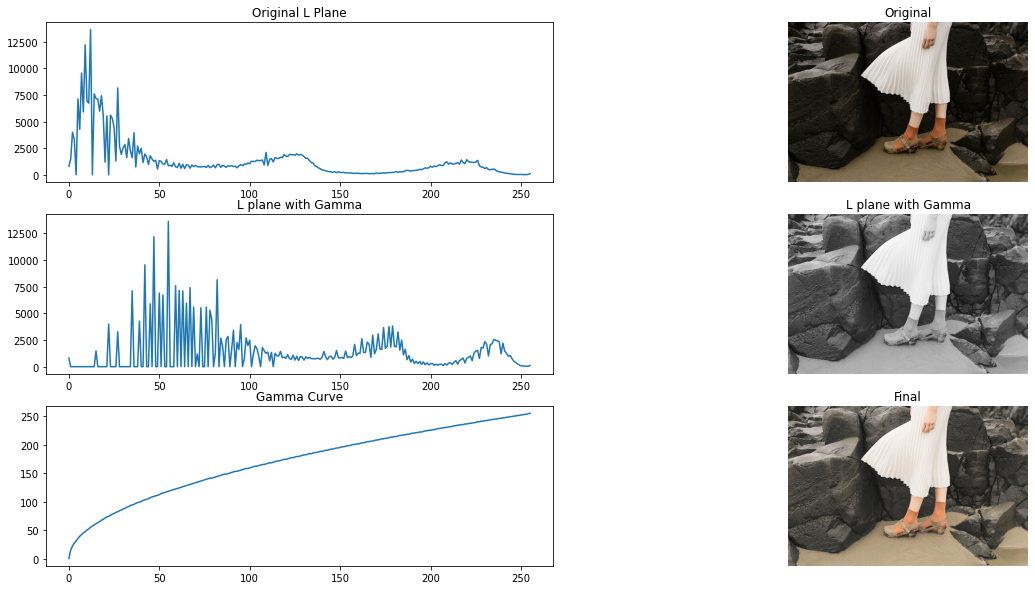

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img =cv.imread(r'./Images/highlights_and_shadows.jpg')
assert img is not None

c_img = cv.cvtColor(img,cv.COLOR_BGR2LAB)
(L,A,B)= cv.split(c_img)


gamma= 0.5
t = np.array([((p/255)**gamma)*255 for p in range (0,256)]).astype(np.uint8)
gammaImg = cv.LUT(L,t)
Combine = cv.merge([gammaImg,A,B])

fig,ax1 = plt.subplots(3,2)

ax1[0][0].plot(cv.calcHist([L],[0],None,[256],[0,256]))
ax1[1][0].plot(cv.calcHist([gammaImg],[0],None,[256],[0,256]))
ax1[2][0].plot(t)

ax1[0][1].set_title("Original")
ax1[1][1].set_title("L plane with Gamma")
ax1[2][1].set_title("Final")

ax1[0][1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax1[1][1].imshow(cv.cvtColor(gammaImg, cv.COLOR_BGR2RGB))
ax1[2][1].imshow(cv.cvtColor(Combine, cv.COLOR_LAB2RGB))

ax1[0][0].set_title("Original L Plane")
ax1[1][0].set_title("L plane with Gamma")
ax1[2][0].set_title("Gamma Curve")

fig.set_figheight(10)
fig.set_figwidth(20)

for i in range(3):
    ax1[i][1].axis('off')




The pictures show the orginal,the seperated L plane from the LAB colour format image with gamma intensity change and the final image with the modified L plane combined with other planes.The curves show the 2 histograms of the L plane and the the L plane with gamma.The final curve shows the gamma intensity curve applied 

# 4)

(-0.5, 499.5, 499.5, -0.5)

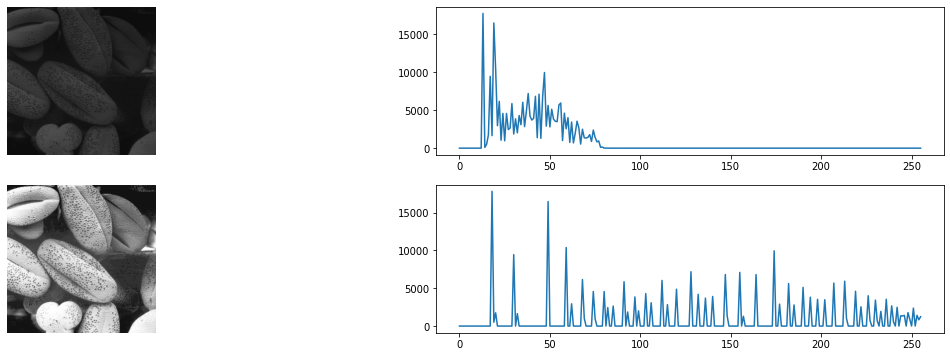

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

 
img0 =cv.imread(r'./images/shells.png',cv.IMREAD_GRAYSCALE)
assert img is not None

def Equ_lup(img):
    
    hist_eq = cv.calcHist([img], [0], None, [256], [0,256]) 
    #getting the histogram for image

    look_up = []
    sum = 0
    M,N = img.shape
    L = 256

    for val in hist_eq:
        sum+=val[0]
        look_up.append(round((sum*(L-1))/(M*N)))


    return np.array(look_up)

hist_1 = cv.calcHist([img0], [0], None, [256], [0,256])
look_up =Equ_lup(img0)
img1 = cv.LUT(img0, look_up)

    
hist_eq = cv.calcHist([img1.astype(np.uint8)], [0], None, [256], [0,256]) 


fig, ax = plt.subplots(2,2,figsize = (20,6))


ax[0][0].imshow(cv.cvtColor(img0, cv.COLOR_GRAY2RGB))
ax[0][0].axis('off')
ax[0][1].plot(hist_1)
ax[1][0].imshow(cv.cvtColor(img1.astype(np.uint8), cv.COLOR_GRAY2RGB))
ax[1][1].plot(hist_eq)
ax[1][0].axis('off')



The histogram of colour intensities availale in the grayscale figure is shown in the first histogram.To histogram equalization a look up table is generated from the function Equ_lup.This is done by getting the CDF and doing the relavent operation (coded in the function).Then the equalized histogram is drawn according to the lookup.It is shown in the 2nd graph.The change in the figure due to this can also be seen by the two corresponding figures.The results of histogram equalization by this function is similar to the inbuild function.The histograms are also identical.

# 5)

(<matplotlib.image.AxesImage at 0x1969d632b80>,
 None,
 Text(0.5, 1.0, 'Bilinear Zoom x4'))

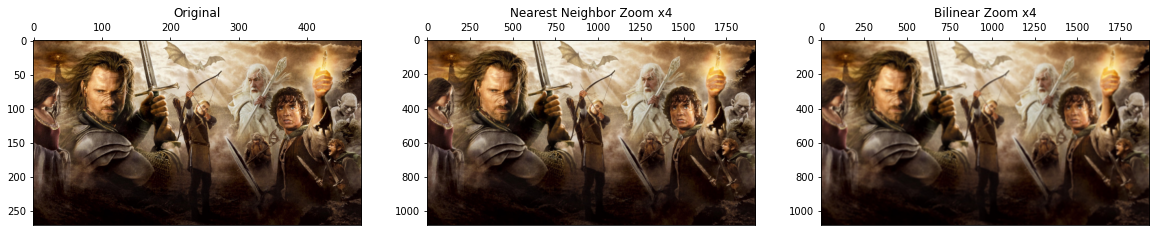

In [34]:
im = cv.imread("images/im01small.png",cv.IMREAD_COLOR)
assert im is not None
im = cv.cvtColor(im,cv.COLOR_BGR2RGB)

def NearestN_zoom1D(img,scale):
    im_rows = img.shape[0]
    im_cols = img.shape[1]
    Zoom_im_rows = int(im_rows * scale)
    Zoom_im_cols = int(im_cols * scale)
    zoomedImg = np.zeros((Zoom_im_rows,Zoom_im_cols),dtype=np.uint8)
    for y in range(Zoom_im_rows):
        for x in range(Zoom_im_cols):
            y_org = int(min(y // scale + int(y%scale >= 0.5),
                     im_rows-1));
            x_org = int(min(x // scale + int(x%scale >= 0.5),
                     im_cols-1));
            zoomedImg[y,x] = img[y_org,x_org]
    return zoomedImg


def Bil_zoom1D(img,scale):
    im_rows = img.shape[0]
    im_cols = img.shape[1]
    Zoom_im_rows = int(im_rows * scale)
    Zoom_im_cols = int(im_cols * scale)
    zoomedImg = np.zeros((Zoom_im_rows,Zoom_im_cols),dtype=np.uint8)
    for y in range(Zoom_im_rows):
        for x in range(Zoom_im_cols):
            y_org = (y / scale);
            x_org = (x / scale);
            y_frac = y_org %1
            x_frac = x_org %1
            
            
            y00 = int(y_org)
            x00 = int(x_org)
            y01 = min(im_rows-1,y00+1)
            x01 = min(im_cols-1,x00+1)
            
            intensity_x_0 = img[y00,x00]*y_frac + img[y01,x00]*(1-y_frac)
            intensity_x_1 = img[y00,x01]*y_frac + img[y01,x01]*(1-y_frac)
            
            intensity = intensity_x_0 * x_frac  + intensity_x_1 * (1-x_frac)
            intensity = int(intensity)
            
            zoomedImg[y,x] = intensity
    return zoomedImg 

def NearestN_zoom(img,scale):
    p1,p2,p3 = cv.split(img);
    return cv.merge((NearestN_zoom1D(p1,scale),NearestN_zoom1D(p2,scale),NearestN_zoom1D(p3,scale)))


def Bl_zoom(img,scale):
    p1,p2,p3 = cv.split(img);
    return cv.merge((Bil_zoom1D(p1,scale),Bil_zoom1D(p2,scale),Bil_zoom1D(p3,scale))) 
zoomedImgNN = NearestN_zoom(im,4);
zoomedImgBI = Bl_zoom(im,4);


fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(im,cmap="gray",vmax=255,vmin=0),ax[0].xaxis.tick_top(),ax[0].set_title("Original")

ax[1].imshow(zoomedImgNN,vmax=255,vmin=0),ax[1].xaxis.tick_top(),ax[1].set_title("Nearest Neighbor Zoom x4")
ax[2].imshow(zoomedImgBI,vmax=255,vmin=0),ax[2].xaxis.tick_top(),ax[2].set_title("Bilinear Zoom x4")


Comparison of SSDs

In [28]:
org_imgs = ["im01small.png","im02small.png"];
zoomedorg_imgs = ["im01.png","im02.png"];
print("Nearest neighbor Zooming SSD")
for i in range(2):
    im_to_zoom = cv.imread("images/"+org_imgs[i] ,cv.IMREAD_COLOR)
    assert im_to_zoom is not None
    im_zoomed = cv.imread("images/"+zoomedorg_imgs[i] ,cv.IMREAD_COLOR)
    assert im_zoomed is not None
    zoomed = NearestN_zoom(im_to_zoom,4)
    SSD = np.sum((zoomed - im_zoomed)**2)/(im_zoomed.shape[0]*im_zoomed.shape[1]*im_zoomed.shape[2])
    print("image:", i," - ",SSD)
    
print("Bilinear interpolation Zooming SSD")
for i in range(2):
    im_to_zoom = cv.imread("images/"+org_imgs[i] ,cv.IMREAD_COLOR)
    assert im_to_zoom is not None
    im_zoomed = cv.imread("images/"+zoomedorg_imgs[i] ,cv.IMREAD_COLOR)
    assert im_zoomed is not None
    zoomed = Bl_zoom(im_to_zoom,4)
    SSD = np.sum((zoomed - im_zoomed)**2)/(im_zoomed.shape[0]*im_zoomed.shape[1]*im_zoomed.shape[2])
    print("image:", i," - ",SSD)


Nearest neighbor Zooming SSD
image: 0  -  52.55124839248971
image: 1  -  23.602486545138888
Bilinear interpolation Zooming SSD
image: 0  -  50.66079282407407
image: 1  -  22.207302806712963


Functions to implement zoom in both ways Nearest-neighbor and  Bilinear interpolation are coded above and the results look similar.To test the algorithms SSDs are also calculated.From the results it can be concluded that Bilinear Interpolation is better than Nearest Neighbor Zooming.

# 6)

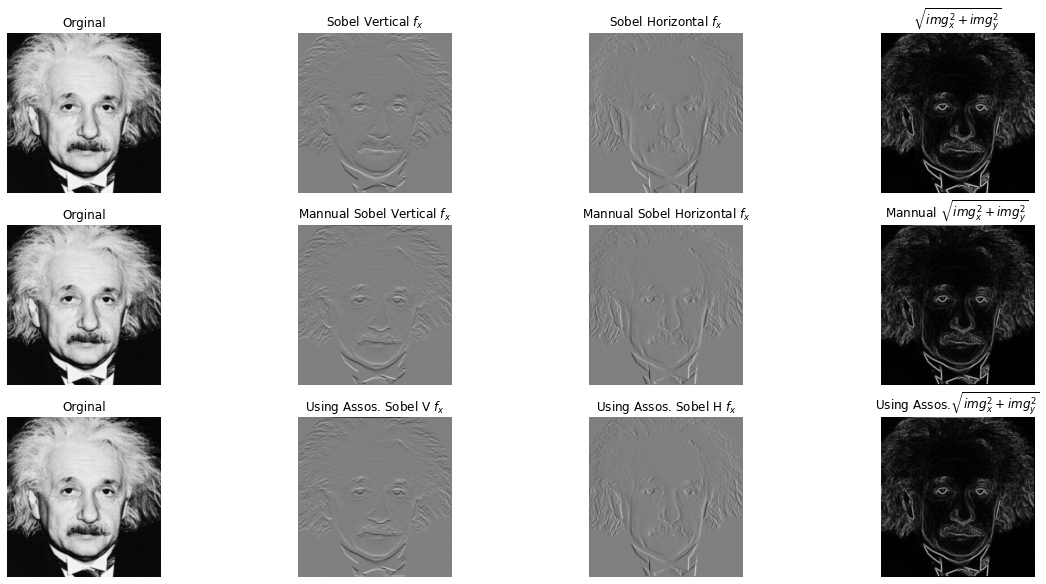

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f =cv.imread(r'./images/einstein.png',cv.IMREAD_GRAYSCALE).astype('float32')
assert f is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
f_x = cv.filter2D(f, -1, sobel_v )

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)
f_y = cv.filter2D(f, -1, sobel_h )

grad_mag = np.sqrt(f_x**2 + f_y**2)



def sobel_mannual(image, kernel):
    padding =1
    strides =1
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image 
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    
    imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    #print(imagePadded)
  

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


sf_h = sobel_mannual(f, sobel_h)
sf_v = sobel_mannual(f, sobel_v)
grad_mag_mn = np.sqrt(sf_h**2 + sf_v**2)

X = np.array([[1,2,1]])
Y = np.array([[-1],[0],[1]])


sobel_v_as =sobel_mannual(sobel_mannual(f, X),Y)
sobel_h_as = sobel_mannual(sobel_mannual(f, Y.T),X.T)
grad_mag_as = np.sqrt(sobel_h_as**2 + sobel_v_as**2)

fig,ax = plt.subplots (3,4,figsize = (20,10))
ax[0,0].imshow(f,cmap='gray',vmin = 0 ,vmax = 255)
ax[0,0].set_title('Orginal')
ax[0,1].imshow(f_x,cmap='gray',vmin = -1020 ,vmax =1020)
ax[0,1].set_title(r'Sobel Vertical $f_x$')
ax[0,2].imshow(f_y,cmap='gray',vmin = -1020 ,vmax =1020)
ax[0,2].set_title(r'Sobel Horizontal $f_x$')
ax[0,3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[0,3].imshow(grad_mag, cmap = 'gray')

ax[1,0].imshow(f,cmap='gray',vmin = 0 ,vmax = 255)
ax[1,0].set_title('Orginal')
ax[1,1].imshow(sf_v,cmap='gray',vmin = -1020 ,vmax =1020)
ax[1,1].set_title(r'Mannual Sobel Vertical $f_x$')
ax[1,2].imshow(sf_h,cmap='gray',vmin = -1020 ,vmax =1020)
ax[1,2].set_title(r'Mannual Sobel Horizontal $f_x$')
ax[1,3].set_title('Mannual $\sqrt{img_x^2+img_y^2}$')
ax[1,3].imshow(grad_mag_mn, cmap = 'gray')


ax[2,0].imshow(f,cmap='gray',vmin = 0 ,vmax = 255)
ax[2,0].set_title('Orginal')
ax[2,1].imshow(sobel_v_as,cmap='gray',vmin = -1020 ,vmax =1020)
ax[2,1].set_title(r'Using Assos. Sobel V $f_x$')
ax[2,2].imshow(sobel_h_as,cmap='gray',vmin = -1020 ,vmax =1020)
ax[2,2].set_title(r'Using Assos. Sobel H $f_x$')
ax[2,3].set_title('Using Assos.$\sqrt{img_x^2+img_y^2}$')
ax[2,3].imshow(grad_mag_mn, cmap = 'gray')

for i in range(3):
    for j in range (4):
        ax[i,j].axis('off')
plt.show()

6
a)The diagrams in the first row shows the results of the sobel filtering the image using existing filter2D.



6
b)The second row shows how this is done by a defined function 'sobel_mannual' which take the image and the kernal as the parameters.It add padding to the image and convolve the image with the respective kernal and return the output array.It has given very similar results to the using of filter2D as the operations are similar.

6
c)Due to the assosiative property of convolution when the sobel kernal is expressed as a matrix multiplication components and the image is convoluted by each compnent in order the same final result can be obtained as convoluting the whole kernal at once. This is verified by the results in the 3rd row

# 7.a)

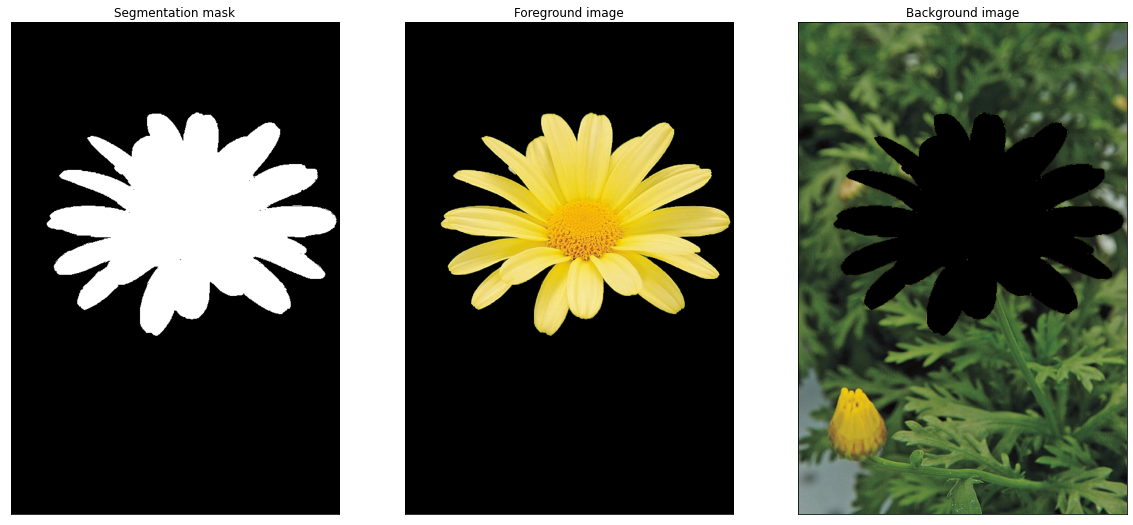

In [35]:
im = cv.imread(r'./images/daisy.jpg',cv.IMREAD_COLOR)
mask = np.zeros(im.shape[:2], np.uint8)
bg_mod = np.zeros((1, 65), np.float64)
fg_mod = np.zeros((1, 65), np.float64)
rectangle = (25,125,530,450)
(mask,bg_mod,fg_mod)=cv.grabCut(im, mask, rectangle,bg_mod, fg_mod,3, cv.GC_BGD)
outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),0, 1)
outputMask = (outputMask * 255).astype("uint8")
output = cv.bitwise_and(im, im, mask=outputMask)
back_im=im-output
fig,axes=plt.subplots(1,3,figsize=(20,10))
axes[0].imshow(cv.cvtColor(outputMask,cv.COLOR_BGR2RGB))
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('Segmentation mask')
axes[1].imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('Foreground image')
axes[2].imshow(cv.cvtColor(back_im,cv.COLOR_BGR2RGB))
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[2].set_title('Background image')
plt.show()

This was done following the documentationof opencv grabCut (https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html).We can see an accurate mask generated by comparing the above results to seperate the background

# 7.b)

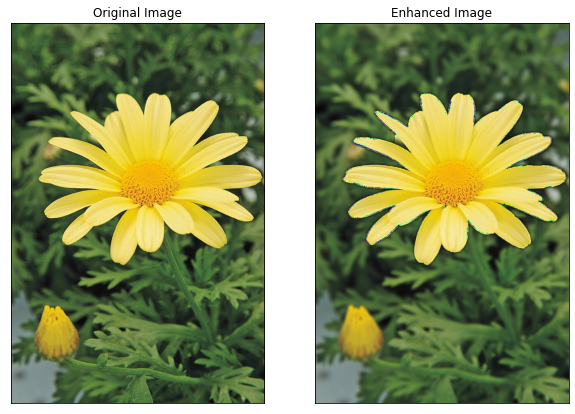

In [ ]:
kernel_size=9
sigma=3
blurred_back=cv.GaussianBlur(back_im,(kernel_size,kernel_size),sigma)
enhanced_img=output+blurred_back
fig,axes=plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('Original Image')
axes[1].imshow(cv.cvtColor(enhanced_img,cv.COLOR_BGR2RGB))
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('Enhanced Image')
plt.show()

To enchance the image by blurring the background,gaussian blur is applied on the seperated background in the above question.Then the foreground and the blurred background is combined to generate the final enchanced image.The results are shown above.The flower looks more focused in the blurred background but the edges of the flower seems less smooth compared to the orginal figure.

# 7.c)

When the gaussian blur is applied to the seperated background in which the foreground is black,the gaussian blur will mix the black  margin of the background turning pixels near the margin blackish.So when background and foreground is put back together the background just beyond the edge of the flower quite dark in the enhanced image.